In [ ]:
# 接受-拒绝采样的基本方法和步骤

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform
import seaborn

seaborn.set()

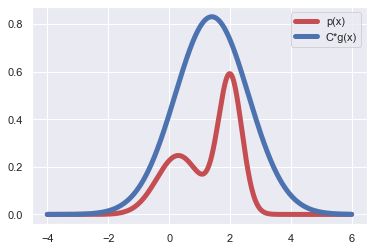

In [2]:


# 目标采样分布的概率密度函数
def p(x):
    return (0.3 * np.exp(-(x - 0.3) ** 2) + 0.7 * np.exp(-(x - 2.) ** 2 / 0.3)) / 1.2113

# 建议分布G
norm_rv = norm(loc=1.4, scale=1.2)
# C值
C = 2.5

x = np.arange(-4., 6., 0.01)
plt.plot(x, p(x), color='r', lw=5, label='p(x)')
plt.plot(x, C*norm_rv.pdf(x), color='b', lw=5, label='C*g(x)')
plt.legend()
plt.show()



AttributeError: 'Rectangle' object has no property 'normed'

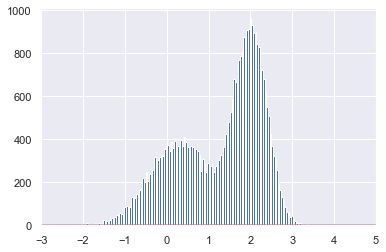

In [3]:


# 目标采样分布的概率密度函数
def p(x):
    return (0.3 * np.exp(-(x - 0.3) ** 2) + 0.7 * np.exp(-(x - 2.) ** 2 / 0.3)) / 1.2113

# 建议分布
norm_rv = norm(loc=1.4, scale=1.2)
# C值
C = 2.5

uniform_rv = uniform(loc=0, scale=1)
sample = []

for i in range(100000):
    Y = norm_rv.rvs(1)[0]
    U = uniform_rv.rvs(1)[0]
    if p(Y) >= U * C * norm_rv.pdf(Y):
        sample.append(Y)

x = np.arange(-3., 5., 0.01)
plt.gca().axes.set_xlim(-3, 5)
plt.plot(x, p(x), color='r')
plt.hist(sample, color='b', bins=150, normed=True, edgecolor='k')
plt.show()